In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#print actual path to the repertory
import os
os.getcwd()

'/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP6'

# A- Analyzing Fisher's Iris with the K-Means algorithm

## 1

In [301]:
df = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP6/iris.csv')

In [302]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [303]:
df.shape

(150, 5)

## 2

In [304]:
y = df['Class']

In [305]:
X = df.drop(['Class'], axis=1)

## 3

In [306]:
liste_attributs = X.columns.tolist()

In [307]:
#Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [308]:
df_scaled = pd.DataFrame(df_scaled, columns = liste_attributs)

In [309]:
pca = PCA(n_components=2)
PCA_val = pca.fit_transform(X)
df_iris_PCA = pd.DataFrame(data = PCA_val, columns = ['PC1', 'PC2'])
df_iris_PCA_class = pd.concat([df_iris_PCA, y], axis = 1)

In [310]:
df_iris_PCA_class.head()

,PC1,PC2,Class
0,-2.684207,0.326607,setosa
1,-2.715391,-0.169557,setosa
2,-2.889820,-0.137346,setosa
3,-2.746437,-0.311124,setosa
4,-2.728593,0.333925,setosa


## 4

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

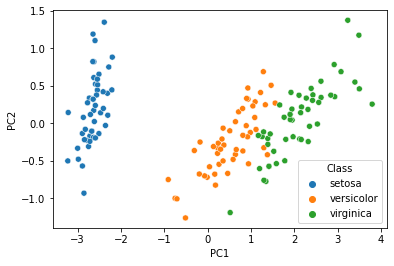

In [312]:
sns.scatterplot(x=df_iris_PCA_class['PC1'], y=df_iris_PCA_class['PC2'], hue = df_iris_PCA_class['Class'])

## 5

In [276]:
from sklearn.cluster import KMeans

In [311]:
kmeans = KMeans(n_clusters= 3, n_init=5, max_iter = 300, random_state=0).fit(X)
kmeans.score(X)
prediction = kmeans.predict(X)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

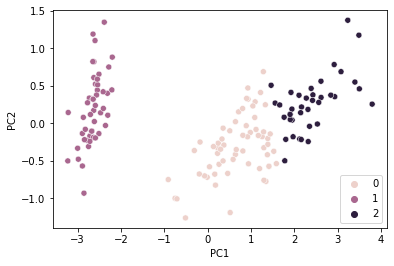

In [314]:
sns.scatterplot(x=df_iris_PCA_class['PC1'], y=df_iris_PCA_class['PC2'], hue = prediction)

## 6

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

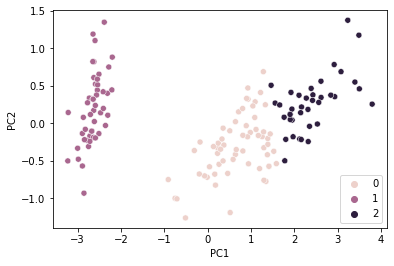

In [279]:
# KMeans with random_state = 1

kmeans = KMeans(n_clusters= 3, n_init=5, max_iter = 300, random_state=1).fit(X)
kmeans.score(X)
prediction = kmeans.predict(X)
sns.scatterplot(x=df_iris_PCA_class['PC1'], y=df_iris_PCA_class['PC2'], hue = prediction)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

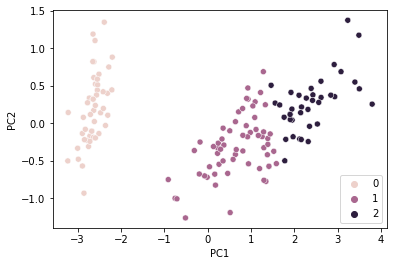

In [27]:
# KMeans with random_state = 2

kmeans = KMeans(n_clusters= 3, n_init=5, max_iter = 300, random_state=2).fit(X)
kmeans.score(X)
prediction = kmeans.predict(X)
sns.scatterplot(x=df_iris_PCA_class['PC1'], y=df_iris_PCA_class['PC2'], hue = prediction)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

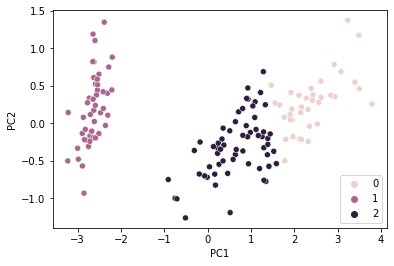

In [78]:
# KMeans with random_state = 20

kmeans = KMeans(n_clusters= 3, n_init=5, max_iter = 300, random_state=20).fit(X)
kmeans.score(X)
prediction = kmeans.predict(X)
sns.scatterplot(x=df_iris_PCA_class['PC1'], y=df_iris_PCA_class['PC2'], hue = prediction)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

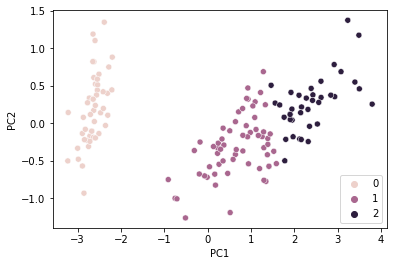

In [79]:
# KMeans with random_state = 100

kmeans = KMeans(n_clusters= 3, n_init=5, max_iter = 300, random_state=100).fit(X)
kmeans.score(X)
prediction = kmeans.predict(X)
sns.scatterplot(x=df_iris_PCA_class['PC1'], y=df_iris_PCA_class['PC2'], hue = prediction)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

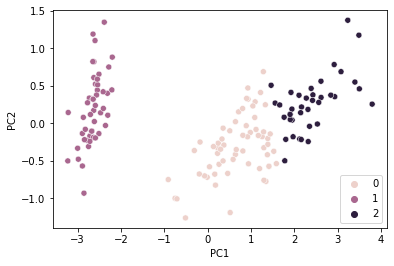

In [284]:
# KMeans with random_state = 500

kmeans = KMeans(n_clusters= 3, n_init=5, max_iter = 300, random_state=500).fit(X)
kmeans.score(X)
prediction = kmeans.predict(X)

sns.scatterplot(x=df_iris_PCA_class['PC1'], y=df_iris_PCA_class['PC2'], hue = prediction)


## 7

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
y[y=='setosa']=1
y[y=='versicolor']=0
y[y=='virginica']=2
y = y.to_numpy()

/var/folders/f0/q7nn178n5cldx0lvl6yvbbn40000gn/T/ipykernel_78377/3387534316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='setosa']=1
/var/folders/f0/q7nn178n5cldx0lvl6yvbbn40000gn/T/ipykernel_78377/3387534316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='versicolor']=0
/var/folders/f0/q7nn178n5cldx0lvl6yvbbn40000gn/T/ipykernel_78377/3387534316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='virginica']

In [138]:
y = y.astype(int)

Text(0.5, 15.0, 'True labels')

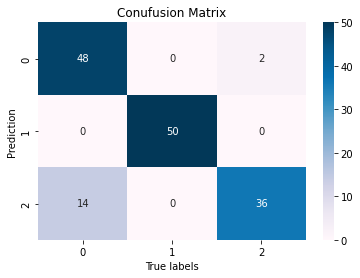

In [139]:
confusion_matrix = confusion_matrix(y, prediction)

sns.heatmap(confusion_matrix, annot = True, cmap = 'PuBu')
plt.title('Conufusion Matrix')
plt.ylabel('Prediction')
plt.xlabel('True labels')

## 8

In [115]:
from sklearn.metrics import silhouette_score

In [116]:
score = silhouette_score(X, prediction)

In [117]:
score

0.5525919445499757

# B- Hierarchical clustering

## 1

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist

## 2

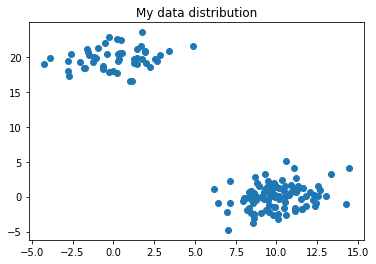

In [145]:
# np.random.seed(0) # uncomment for repeatability
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = [50,])
X = np.concatenate((a,b),)
plt.scatter(X[:,0],X[:,1])
plt.title('My data distribution')
plt.show()

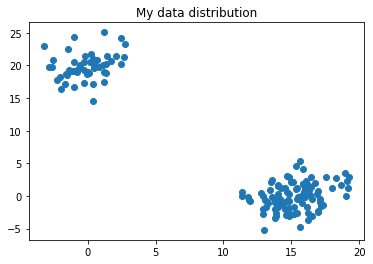

In [189]:
# ([15,0] instead of [10,0]) 

np.random.seed(0) # uncomment for repeatability
a = np.random.multivariate_normal([15,0],[[3,1],[1,4]],size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = [50,])
X = np.concatenate((a,b),)
plt.scatter(X[:,0],X[:,1])
plt.title('My data distribution')
plt.show()

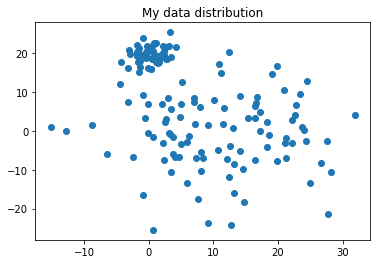

In [150]:
# [100,0],[0,100] instead of [3,1],[1,4]

# np.random.seed(0) # uncomment for repeatability
a = np.random.multivariate_normal([10,0],[[100,0],[0,100]],size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = [50,])
X = np.concatenate((a,b),)
plt.scatter(X[:,0],X[:,1])
plt.title('My data distribution')
plt.show()

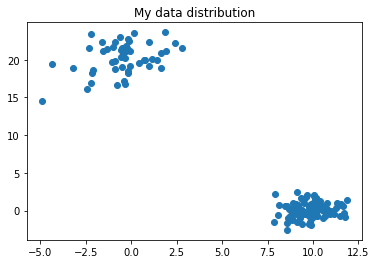

In [152]:
# [1,0],[0,1] instead of [3,1],[1,4]

# np.random.seed(0) # uncomment for repeatability
a = np.random.multivariate_normal([10,0],[[1,0],[0,1]],size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = [50,])
X = np.concatenate((a,b),)
plt.scatter(X[:,0],X[:,1])
plt.title('My data distribution')
plt.show()

## 3

Cophenetic Correlation : 0.9851784398834181


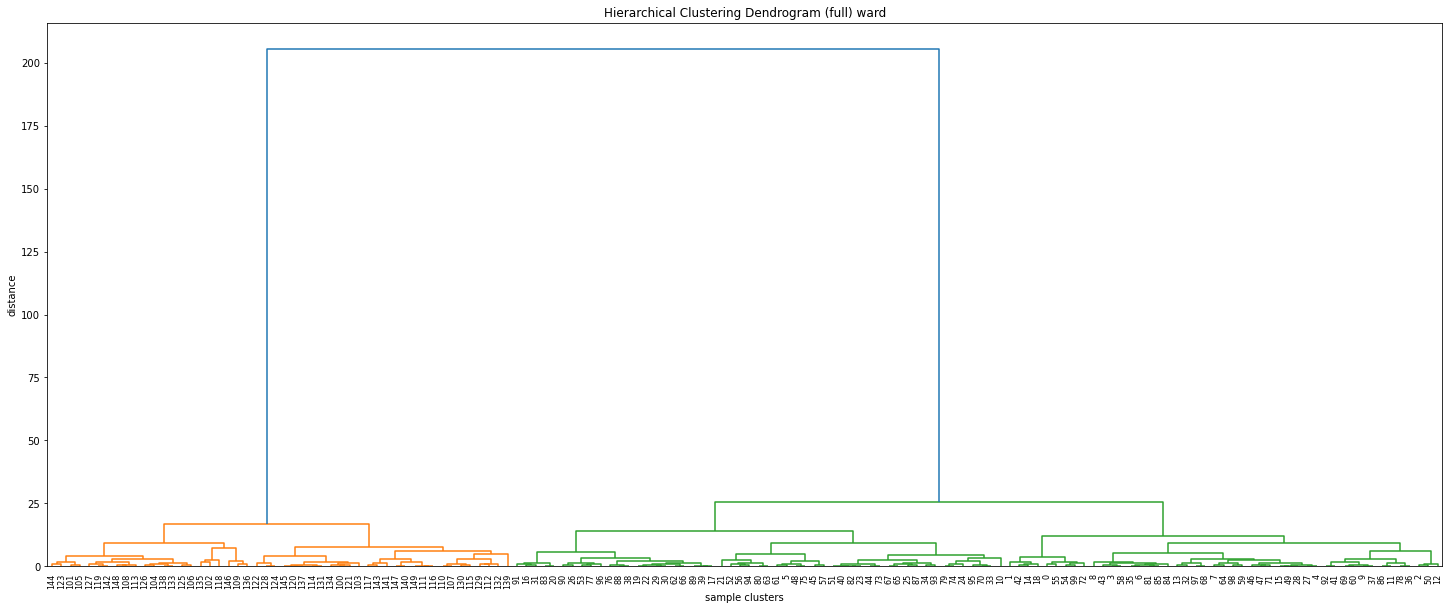

In [190]:
# ward method

Z = linkage(X,'ward', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) ward')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

Cophenetic Correlation : 0.9846969900796247


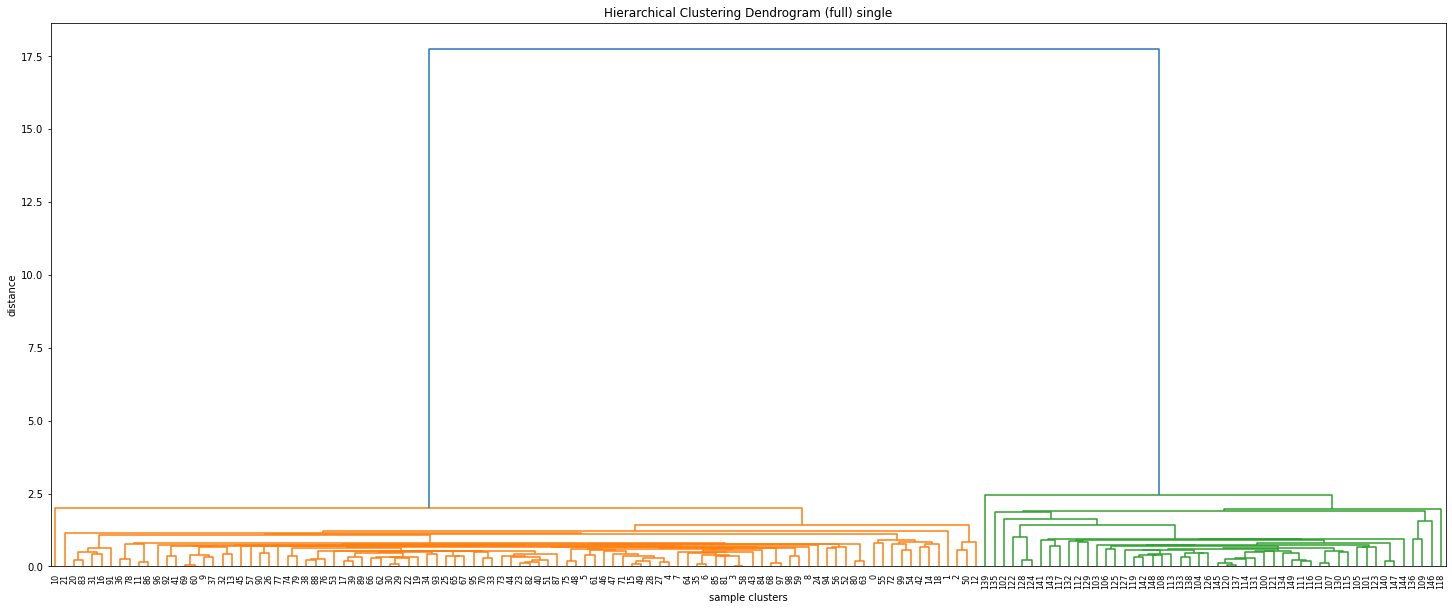

In [191]:
# single method

Z = linkage(X,'single', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) single')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

Cophenetic Correlation : 0.9866742921921796


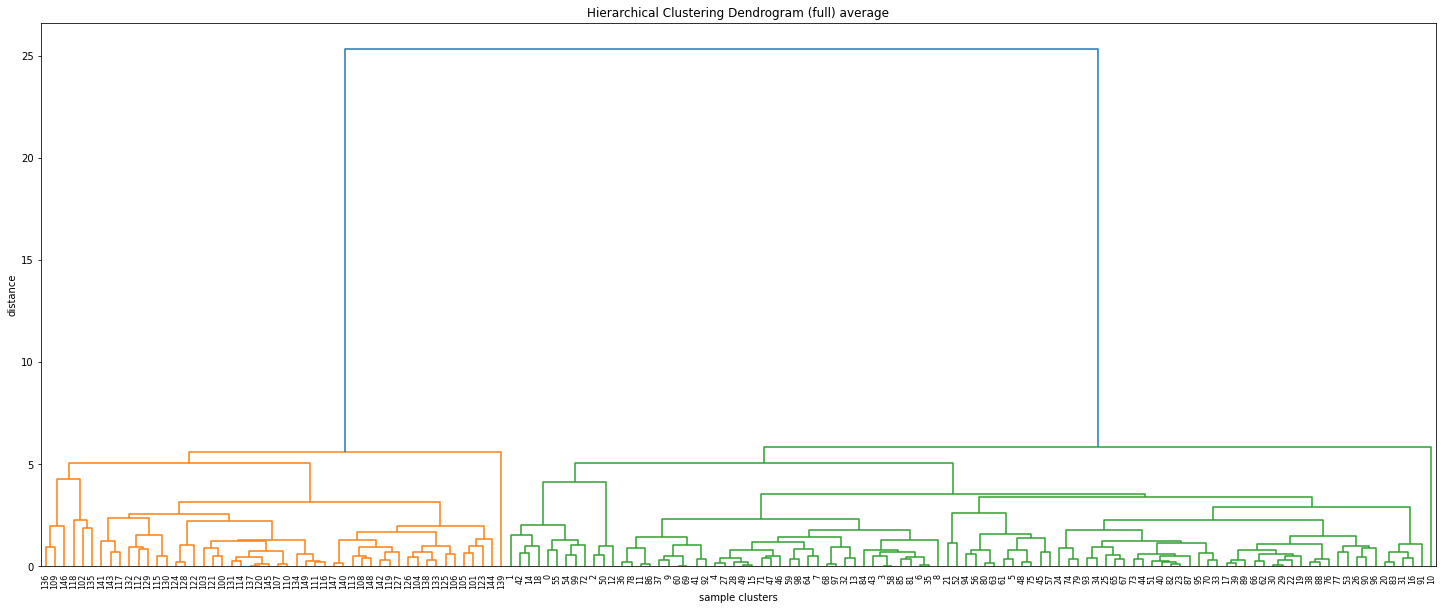

In [170]:
# average method

Z = linkage(X,'average', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) average')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

Cophenetic Correlation : 0.9777710522733132


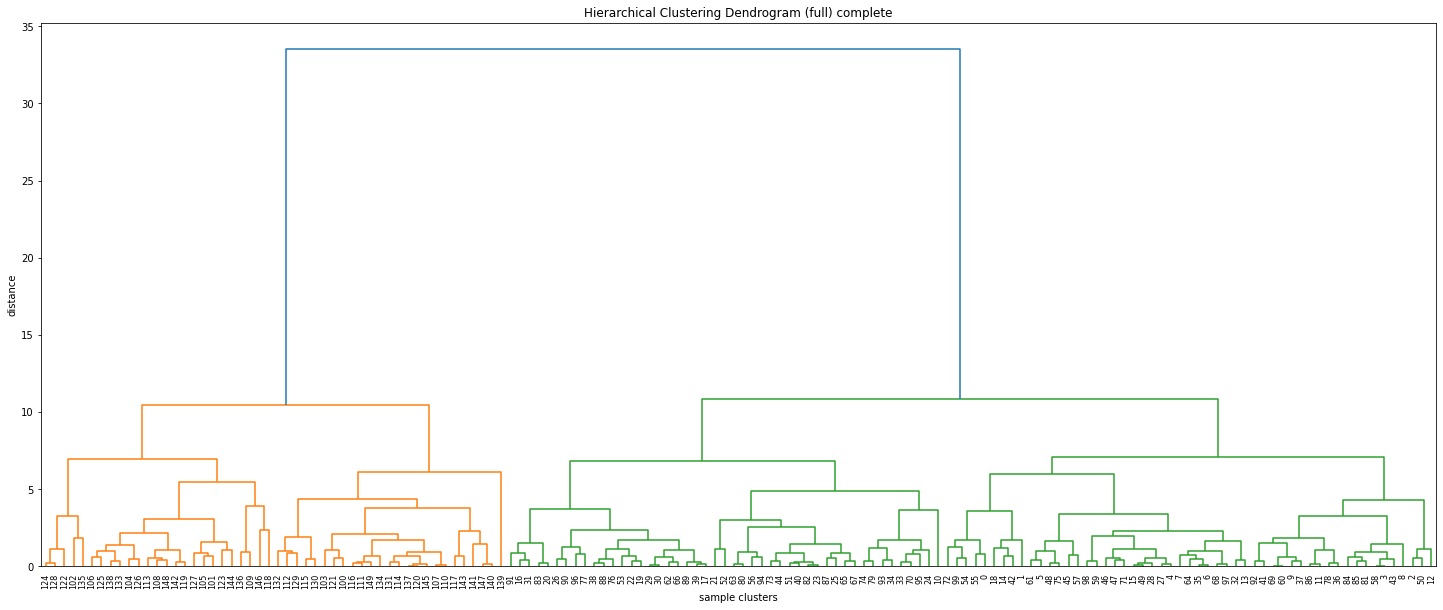

In [171]:
# complete method

Z = linkage(X,'complete', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) complete')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

## 4

In [177]:
Z.shape

(149, 4)

In [192]:
Z

array([[3.00000000e+00, 5.80000000e+01, 8.30289542e-03, 2.00000000e+00],
       [1.20000000e+02, 1.37000000e+02, 3.36186747e-02, 2.00000000e+00],
       [6.90000000e+01, 6.00000000e+01, 4.32016410e-02, 2.00000000e+00],
       [3.50000000e+01, 6.00000000e+00, 6.95735089e-02, 2.00000000e+00],
       [1.50000000e+01, 4.90000000e+01, 7.05830576e-02, 2.00000000e+00],
       [3.00000000e+01, 2.90000000e+01, 8.21053987e-02, 2.00000000e+00],
       [1.10000000e+02, 1.07000000e+02, 1.01920817e-01, 2.00000000e+00],
       [2.30000000e+01, 8.20000000e+01, 1.18780918e-01, 2.00000000e+00],
       [6.80000000e+01, 9.70000000e+01, 1.27842539e-01, 2.00000000e+00],
       [1.45000000e+02, 1.51000000e+02, 1.30816852e-01, 3.00000000e+00],
       [1.10000000e+01, 8.60000000e+01, 1.41607489e-01, 2.00000000e+00],
       [1.57000000e+02, 4.00000000e+01, 1.56133354e-01, 3.00000000e+00],
       [2.70000000e+01, 4.00000000e+00, 1.63556960e-01, 2.00000000e+00],
       [1.70000000e+01, 3.90000000e+01, 1.73240759e

## 5

## 6

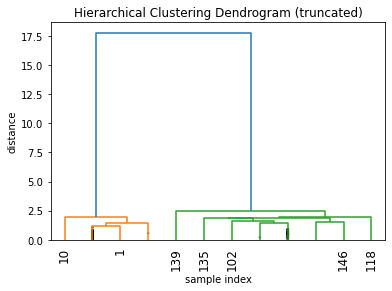

In [193]:
 #d i s p l a y t r u n c a t e d dend rog ram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain
    p=12, #to explain
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

## 7

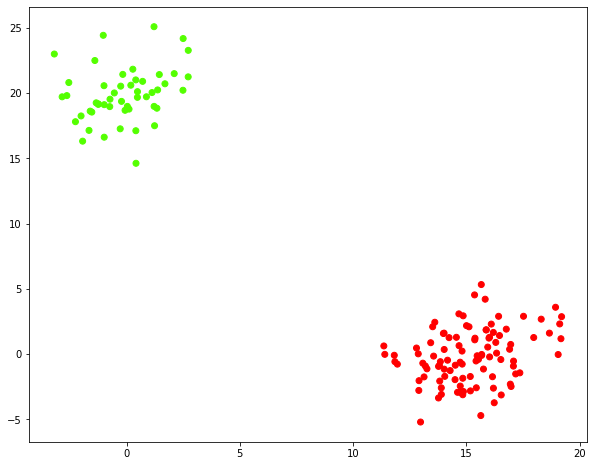

In [194]:
max_d = 14
clusters = fcluster(Z,max_d,criterion='distance')

plt.figure(figsize =(10,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='prism')
plt.show()

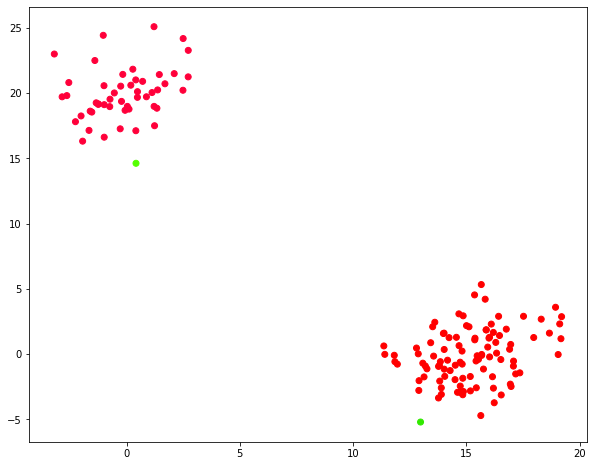

In [195]:
k=4
clusters=fcluster(Z,k,criterion='maxclust')

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='prism')
plt.show()

## 8

Cophenetic Correlation : 0.9866742921921796


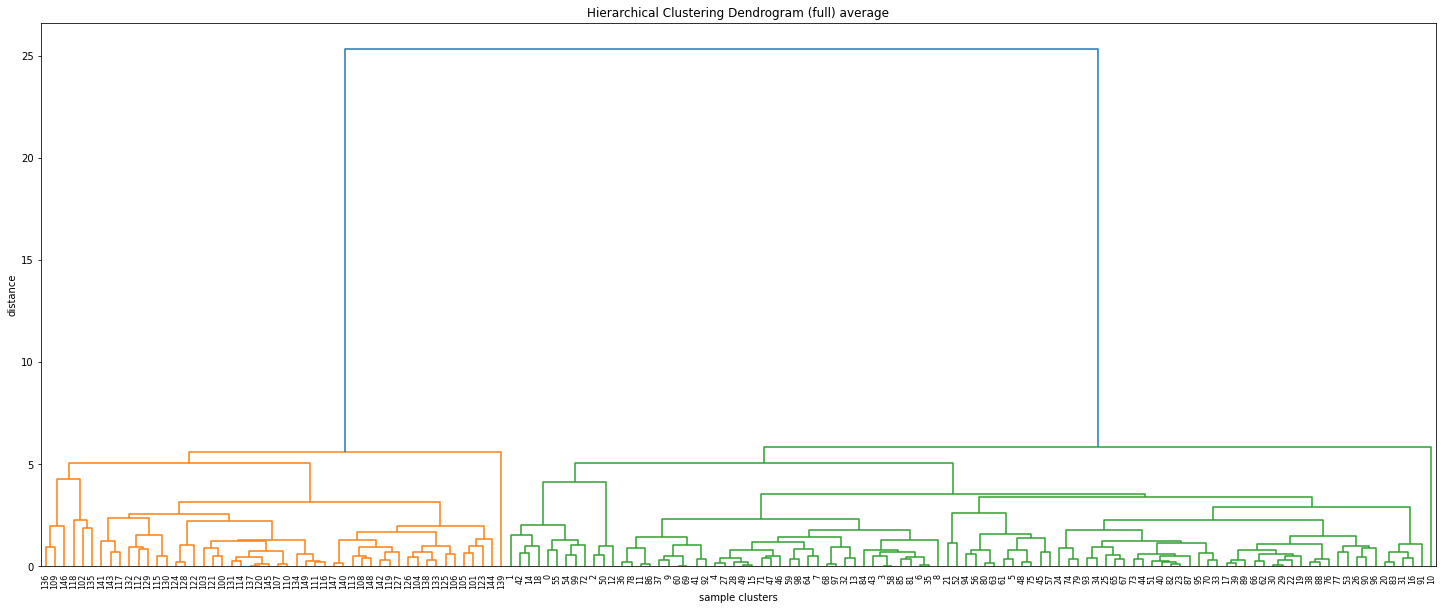

In [196]:
# average method

Z = linkage(X,'average', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) average')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

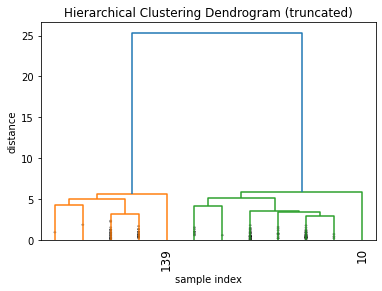

In [197]:
 #d i s p l a y t r u n c a t e d dend rog ram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain
    p=12, #to explain
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

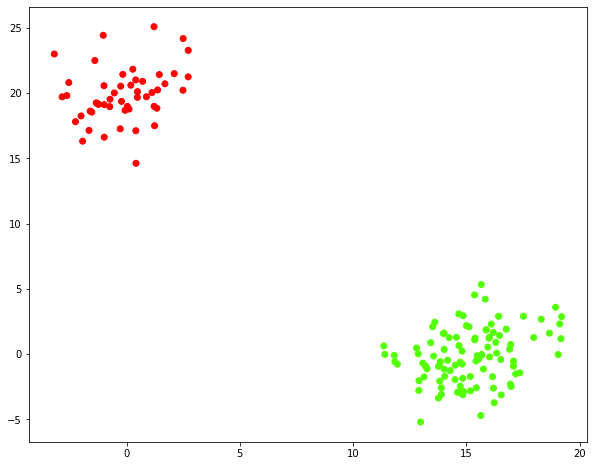

In [198]:
max_d = 14
clusters = fcluster(Z,max_d,criterion='distance')

plt.figure(figsize =(10,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='prism')
plt.show()

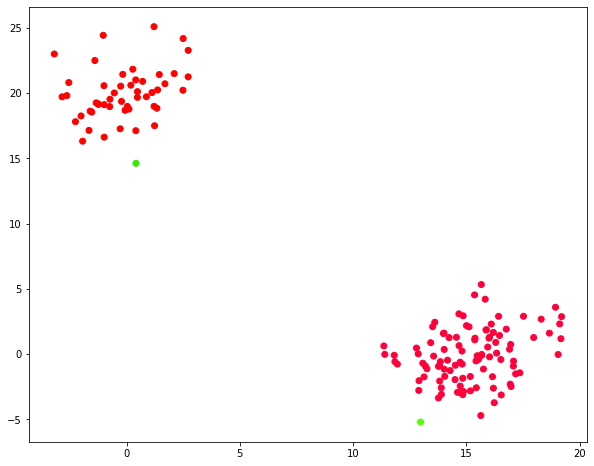

In [199]:
k=4
clusters=fcluster(Z,k,criterion='maxclust')

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='prism')
plt.show()

# C- Wisconsin Data Breast Cancer

In [236]:
data = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP6/wdbc.data',header = None)

In [237]:
data = data.drop([0], axis=1)

In [238]:
y = data[1]

In [239]:
X = data.drop([1], axis=1)

In [240]:
data.shape

(569, 31)

In [241]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [242]:
# Normalize and PCA 
liste_attributs = X.columns.tolist()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(df_scaled, columns = liste_attributs)

pca = PCA(n_components=2)
PCA_val = pca.fit_transform(X)
df_wdbc_PCA = pd.DataFrame(data = PCA_val, columns = ['PC1', 'PC2'])
df_wdbc_PCA_class = pd.concat([df_wdbc_PCA, y], axis = 1)

df_wdbc_PCA_class

,PC1,PC2,1
0,1160.142574,-293.917544,M
1,1269.122443,15.630182,M
2,995.793889,39.156743,M
3,-407.180803,-67.380320,M
4,930.341180,189.340742,M
...,...,...,...
564,1414.126684,110.222492,M
565,1045.018854,77.057589,M
566,314.501756,47.553525,M
567,1124.858115,34.129225,M


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

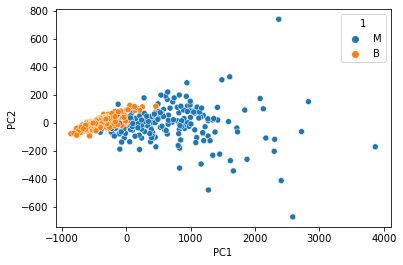

In [244]:
sns.scatterplot(x=df_wdbc_PCA_class['PC1'], y=df_wdbc_PCA_class['PC2'], hue = df_wdbc_PCA_class[1])

Cophenetic Correlation : 0.7851822590254315


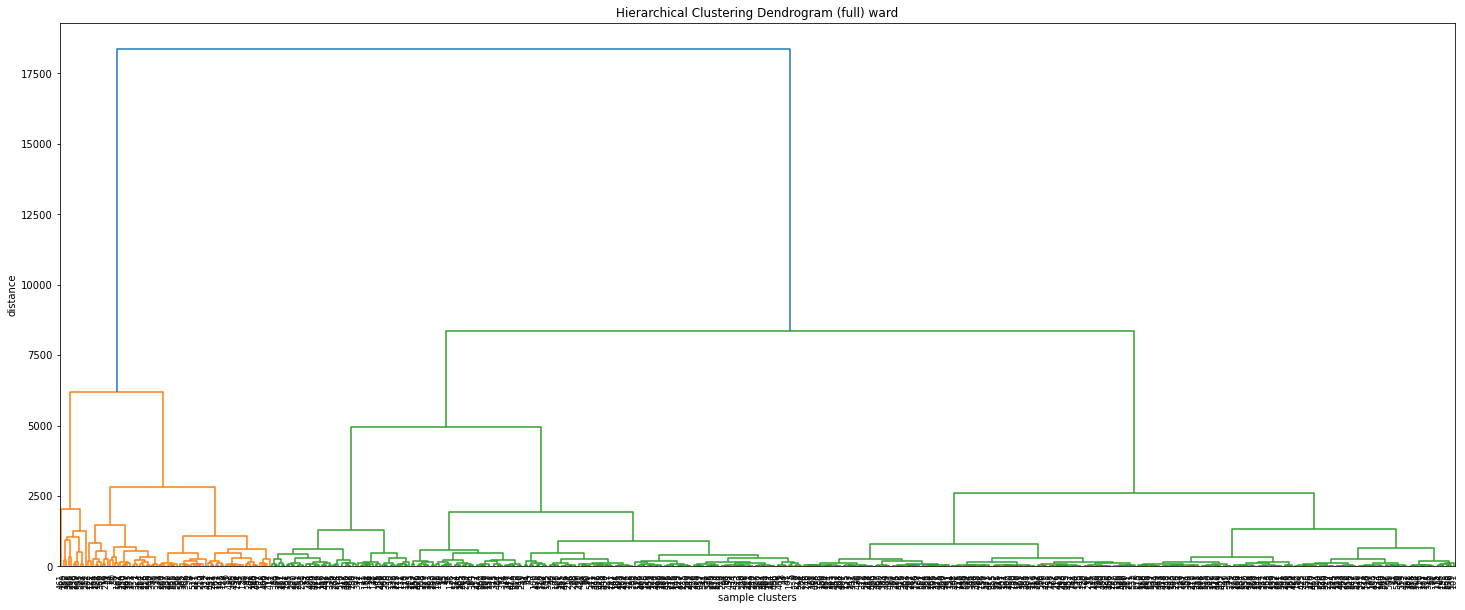

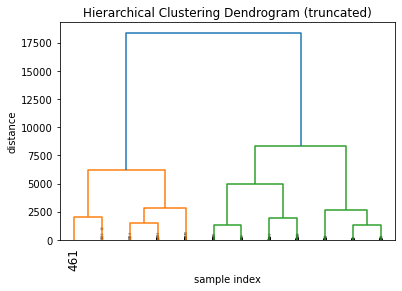

In [245]:
# Ward method

Z = linkage(X,'ward', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) ward')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

 #d i s p l a y t r u n c a t e d dend rog ram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain
    p=12, #to explain
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

Cophenetic Correlation : 0.8655779173352374


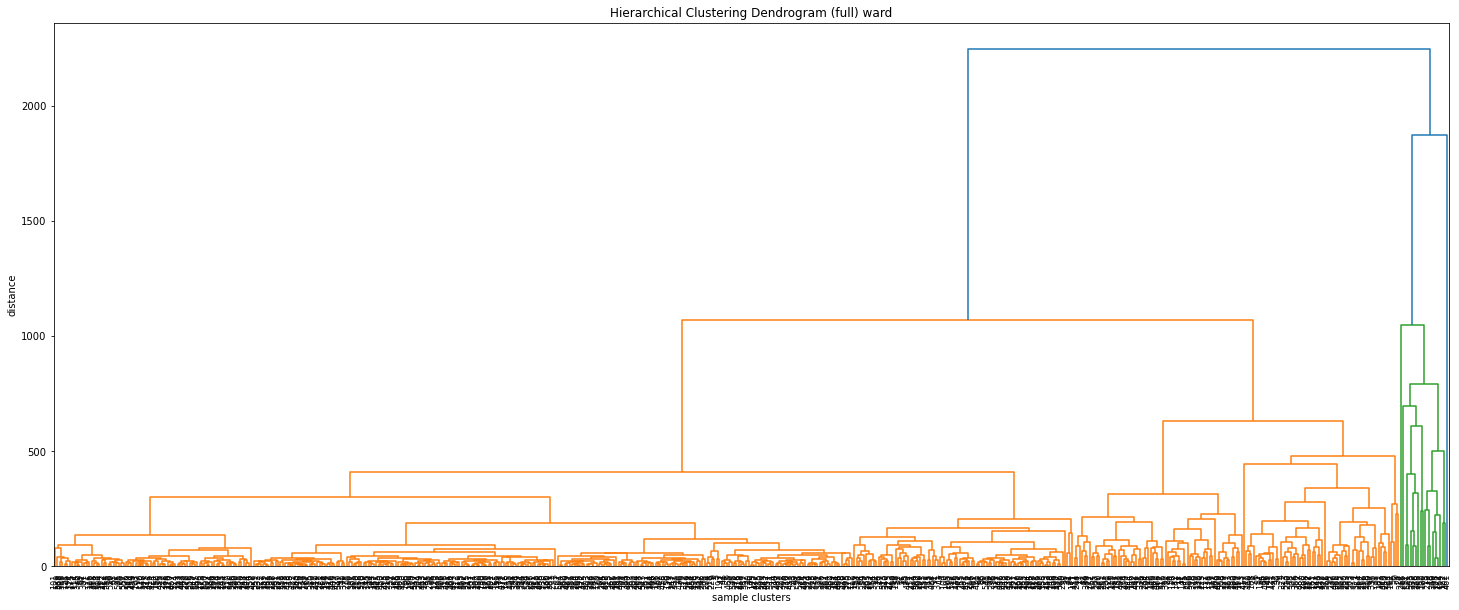

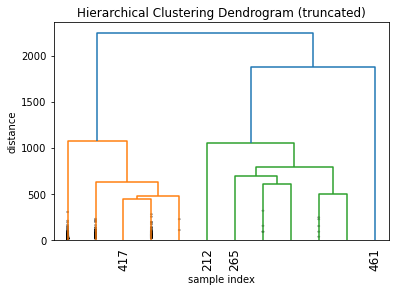

In [249]:
# Average method

Z = linkage(X,'average', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) ward')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

 #d i s p l a y t r u n c a t e d dend rog ram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain
    p=12, #to explain
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

Cophenetic Correlation : 0.8704125131756045


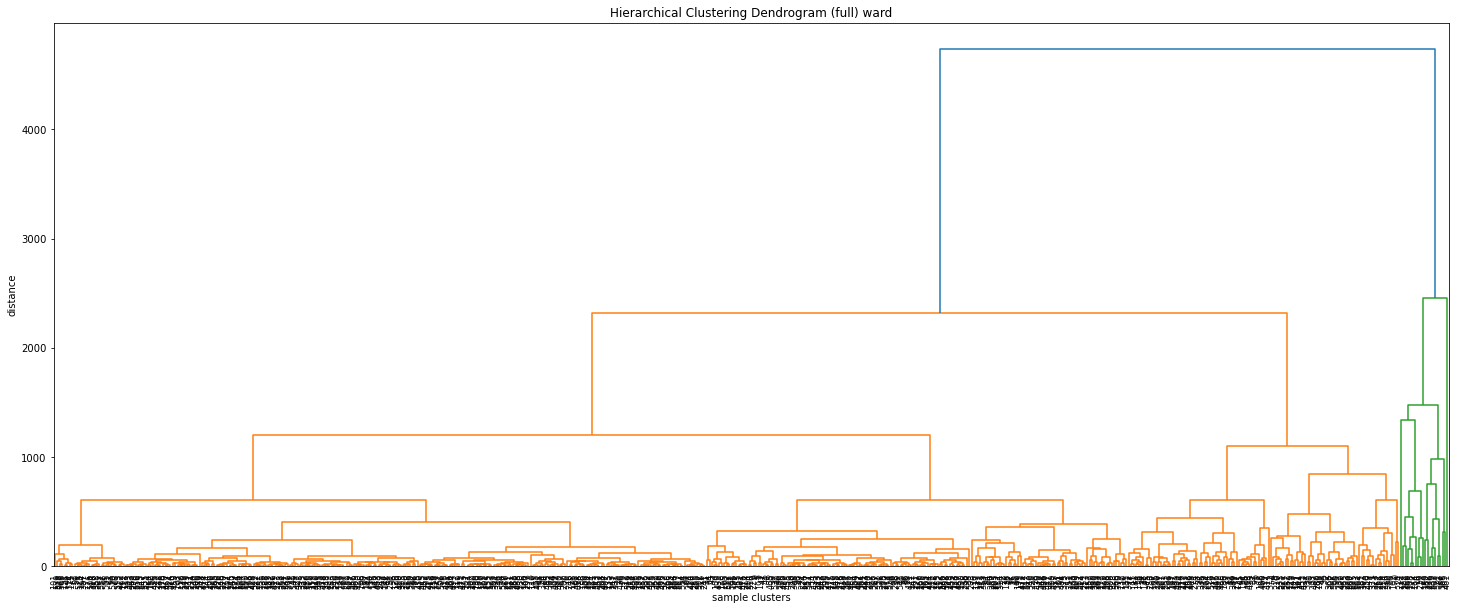

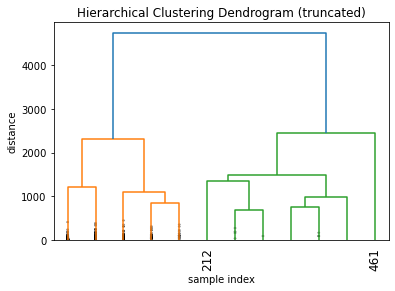

In [247]:
# Complete method

Z = linkage(X,'complete', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) ward')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

 #d i s p l a y t r u n c a t e d dend rog ram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain
    p=12, #to explain
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

Cophenetic Correlation : 0.7222256575011419


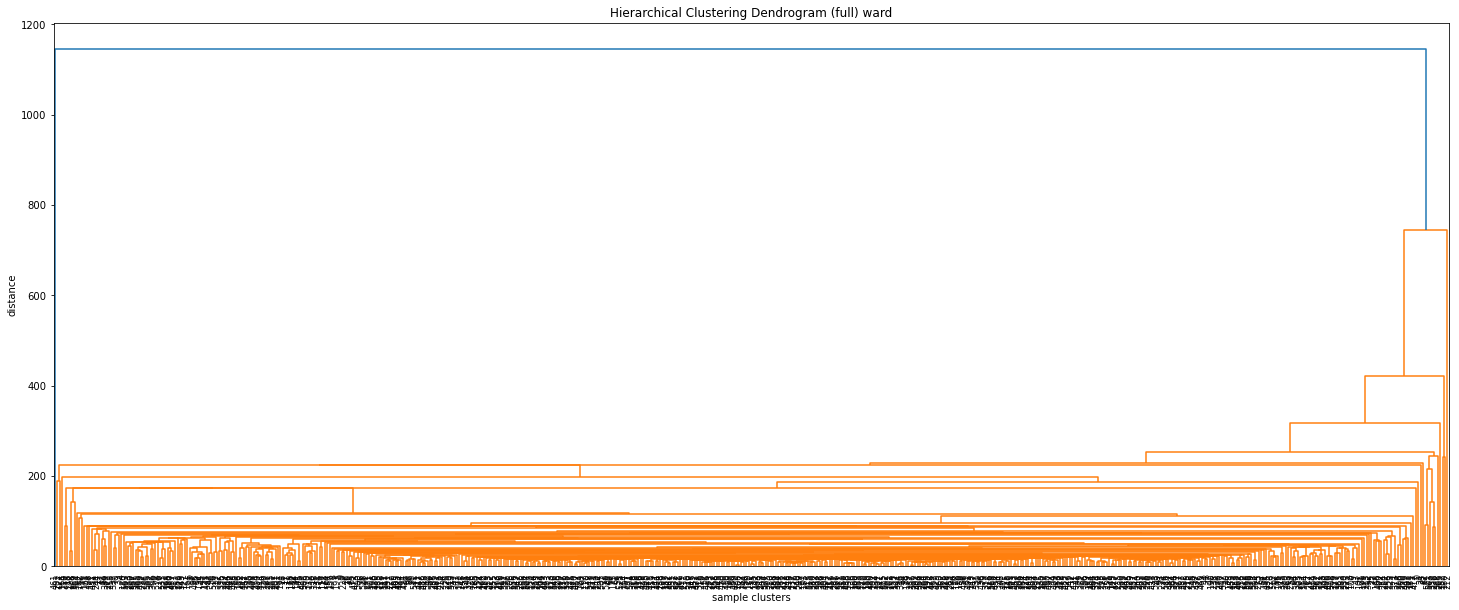

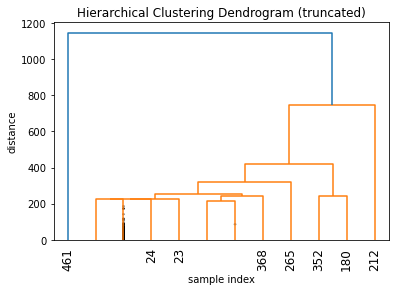

In [248]:
# single method

Z = linkage(X,'single', optimal_ordering = True)
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation :',c )

plt.figure(figsize =(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full) ward')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90.,leaf_font_size= 8.,)
plt.show()

 #d i s p l a y t r u n c a t e d dend rog ram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain
    p=12, #to explain
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

# D- Optimal cluster number in exoplanet data

## 1

In [285]:
ddf = pd.read_csv('exo4_atm_extr.csv', sep=';')

In [286]:
ddf.shape

(1000, 12)

In [287]:
ddf.head()

,PH2O,PHe,PCH4,PH2,PN2,PNH3,PO2,PAr,PCO2,PSO2,PK,Type
0,0.0,8.7,1.3,87.30,0.0,2.70,0.0,0.0,0.0,0.0,0.00,g
1,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,r
2,0.1,7.1,1.7,86.45,0.0,1.15,0.0,0.0,0.0,3.5,0.00,g
3,0.0,2.7,0.0,3.70,41.5,0.00,31.3,6.6,14.2,0.0,0.00,i
4,0.1,11.4,1.1,86.10,0.0,0.20,0.0,0.0,0.0,1.1,0.00,g


In [288]:
y = ddf['Type']
X = ddf.drop(['Type'], axis=1)

## 2

## 3

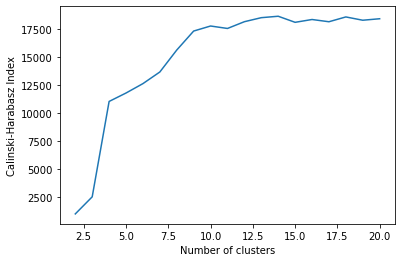

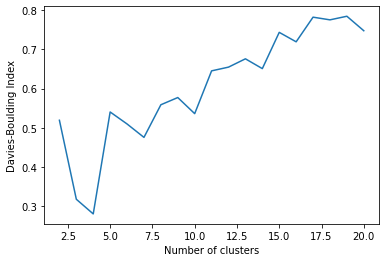

In [266]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

results = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

results2 = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results2.update({i: db_index})

plt.plot(list(results2.keys()), list(results2.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

## 4 

In [292]:
# Normalize and PCA 
liste_attributs = X.columns.tolist()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(df_scaled, columns = liste_attributs)

pca = PCA(n_components=2)
PCA_val = pca.fit_transform(X)
df_atm_PCA = pd.DataFrame(data = PCA_val, columns = ['PC1', 'PC2'])
df_atm_PCA_class = pd.concat([df_atm_PCA, y], axis = 1)

df_atm_PCA_class

,PC1,PC2,Type
0,62.601028,20.801273,g
1,-11.658641,-23.016774,r
2,61.723247,20.286628,g
3,-20.497593,-18.427451,i
4,61.875945,20.367130,g
...,...,...,...
995,-61.497932,56.174189,d
996,-28.503893,0.776264,l
997,-11.658640,-23.016772,r
998,0.471640,-21.591073,i


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

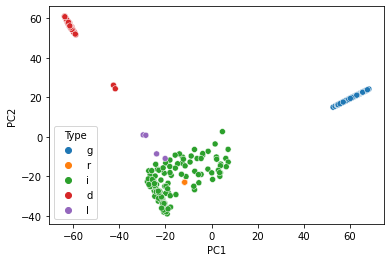

In [294]:
sns.scatterplot(x=df_atm_PCA_class['PC1'], y=df_atm_PCA_class['PC2'], hue = df_atm_PCA_class['Type'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

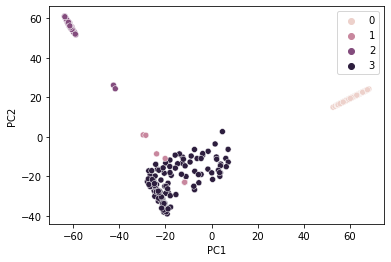

In [295]:
kmeans = KMeans(n_clusters= 4, n_init=5, max_iter = 300, random_state=0).fit(X)
kmeans.score(X)
prediction = kmeans.predict(X)
sns.scatterplot(x=df_atm_PCA_class['PC1'], y=df_atm_PCA_class['PC2'], hue = prediction)

In [298]:
y.value_counts(normalize=True)

r    0.460
g    0.267
d    0.143
i    0.126
l    0.004
Name: Type, dtype: float64